In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_mixed"
mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_mov"
prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_prep"
palette = sns.color_palette("YlOrBr", as_cmap=True)


In [2]:
obs_id_mixed = np.loadtxt(f"{mixed_dir}/obs_id_proj_u")
obs_c_mixed = np.loadtxt(f"{mixed_dir}/obs_c_proj_u")
ctr_mixed =  np.loadtxt(f"{mixed_dir}/ctrl_proj")
obs_id_prep = np.loadtxt(f"{prep_dir}/obs_id_proj_u")
obs_c_prep = np.loadtxt(f"{prep_dir}/obs_c_proj_u")
ctr_prep =  np.loadtxt(f"{prep_dir}/ctrl_proj")
obs_id_mov = np.loadtxt(f"{mov_dir}/obs_id_proj_u")
obs_c_mov = np.loadtxt(f"{mov_dir}/obs_c_proj_u")
ctr_mov =  np.loadtxt(f"{mov_dir}/ctrl_proj")

In [3]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

# plt.style.use(['paper.mplstyle'])
text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles



# axes.spines.right   : False
# axes.spines.top     : False
mpl.rcParams['axes.spines.right'] =  False
mpl.rcParams['axes.spines.top'] =  False
# matplotlib.rc('axes.spines.top', set_visible=False)
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})



In [4]:
obs_eigs_mixed = np.linalg.norm(np.loadtxt(f"{mixed_dir}/obs_c_eigs"),axis=1)*2
obs_eigs_mixed = obs_eigs_mixed
ctr_eigs_mixed =  np.linalg.norm(np.loadtxt(f"{mixed_dir}/ctr_eigs"),axis=1)*2
ctr_eigs_mixed = ctr_eigs_mixed
obs_eigs_prep = np.linalg.norm(np.loadtxt(f"{prep_dir}/obs_c_eigs"),axis=1)*2
obs_eigs_prep = obs_eigs_prep
ctr_eigs_prep =  np.linalg.norm(np.loadtxt(f"{prep_dir}/ctr_eigs"),axis=1)*2
ctr_eigs_prep= ctr_eigs_prep
obs_eigs_mov = np.linalg.norm(np.loadtxt(f"{mov_dir}/obs_c_eigs"),axis=1)*2
obs_eigs_mov= obs_eigs_mov
ctr_eigs_mov =  np.linalg.norm(np.loadtxt(f"{mov_dir}/ctr_eigs"),axis=1)*2
log_ctr_eigs = np.log(ctr_eigs_mixed)
log_obs_eigs = np.log(obs_eigs_mixed)
print(obs_eigs_mixed)

[3.03198000e+00 2.15078000e+00 1.47402800e+00 1.22763200e+00
 8.03296000e-01 6.56706000e-01 5.07782000e-01 4.10338000e-01
 3.12068000e-01 2.73792000e-01 1.60575400e-01 1.30863400e-01
 9.04930000e-02 8.05304000e-02 5.54854000e-02 5.04574000e-02
 3.16306000e-02 2.60696000e-02 1.68405200e-02 1.59000200e-02
 1.15931800e-02 8.23596000e-03 5.53688000e-03 4.53334000e-03
 3.82484000e-03 2.42790000e-03 1.91883400e-03 1.31208000e-03
 1.21013000e-03 9.16424000e-04 7.36896000e-04 5.81962000e-04
 4.78496000e-04 2.55666000e-04 2.06830000e-04 1.44349600e-04
 1.10296200e-04 9.20552000e-05 5.85574000e-05 5.08742000e-05
 2.82236000e-05 2.44132000e-05 1.70547600e-05 1.47321600e-05
 1.07732800e-05 8.39108000e-06 6.09024000e-06 5.11164000e-06
 3.54318000e-06 3.07362000e-06 2.11830000e-06 1.45104000e-06
 1.28226400e-06 7.77982000e-07 6.97002000e-07 4.61284000e-07
 3.30940000e-07 2.10048000e-07 1.74266600e-07 1.25483000e-07
 8.97314000e-08 6.98820000e-08 5.42990000e-08 3.51246000e-08
 2.64408000e-08 1.858912

Text(0.1, 0.48, '$\\textbf{B}$')

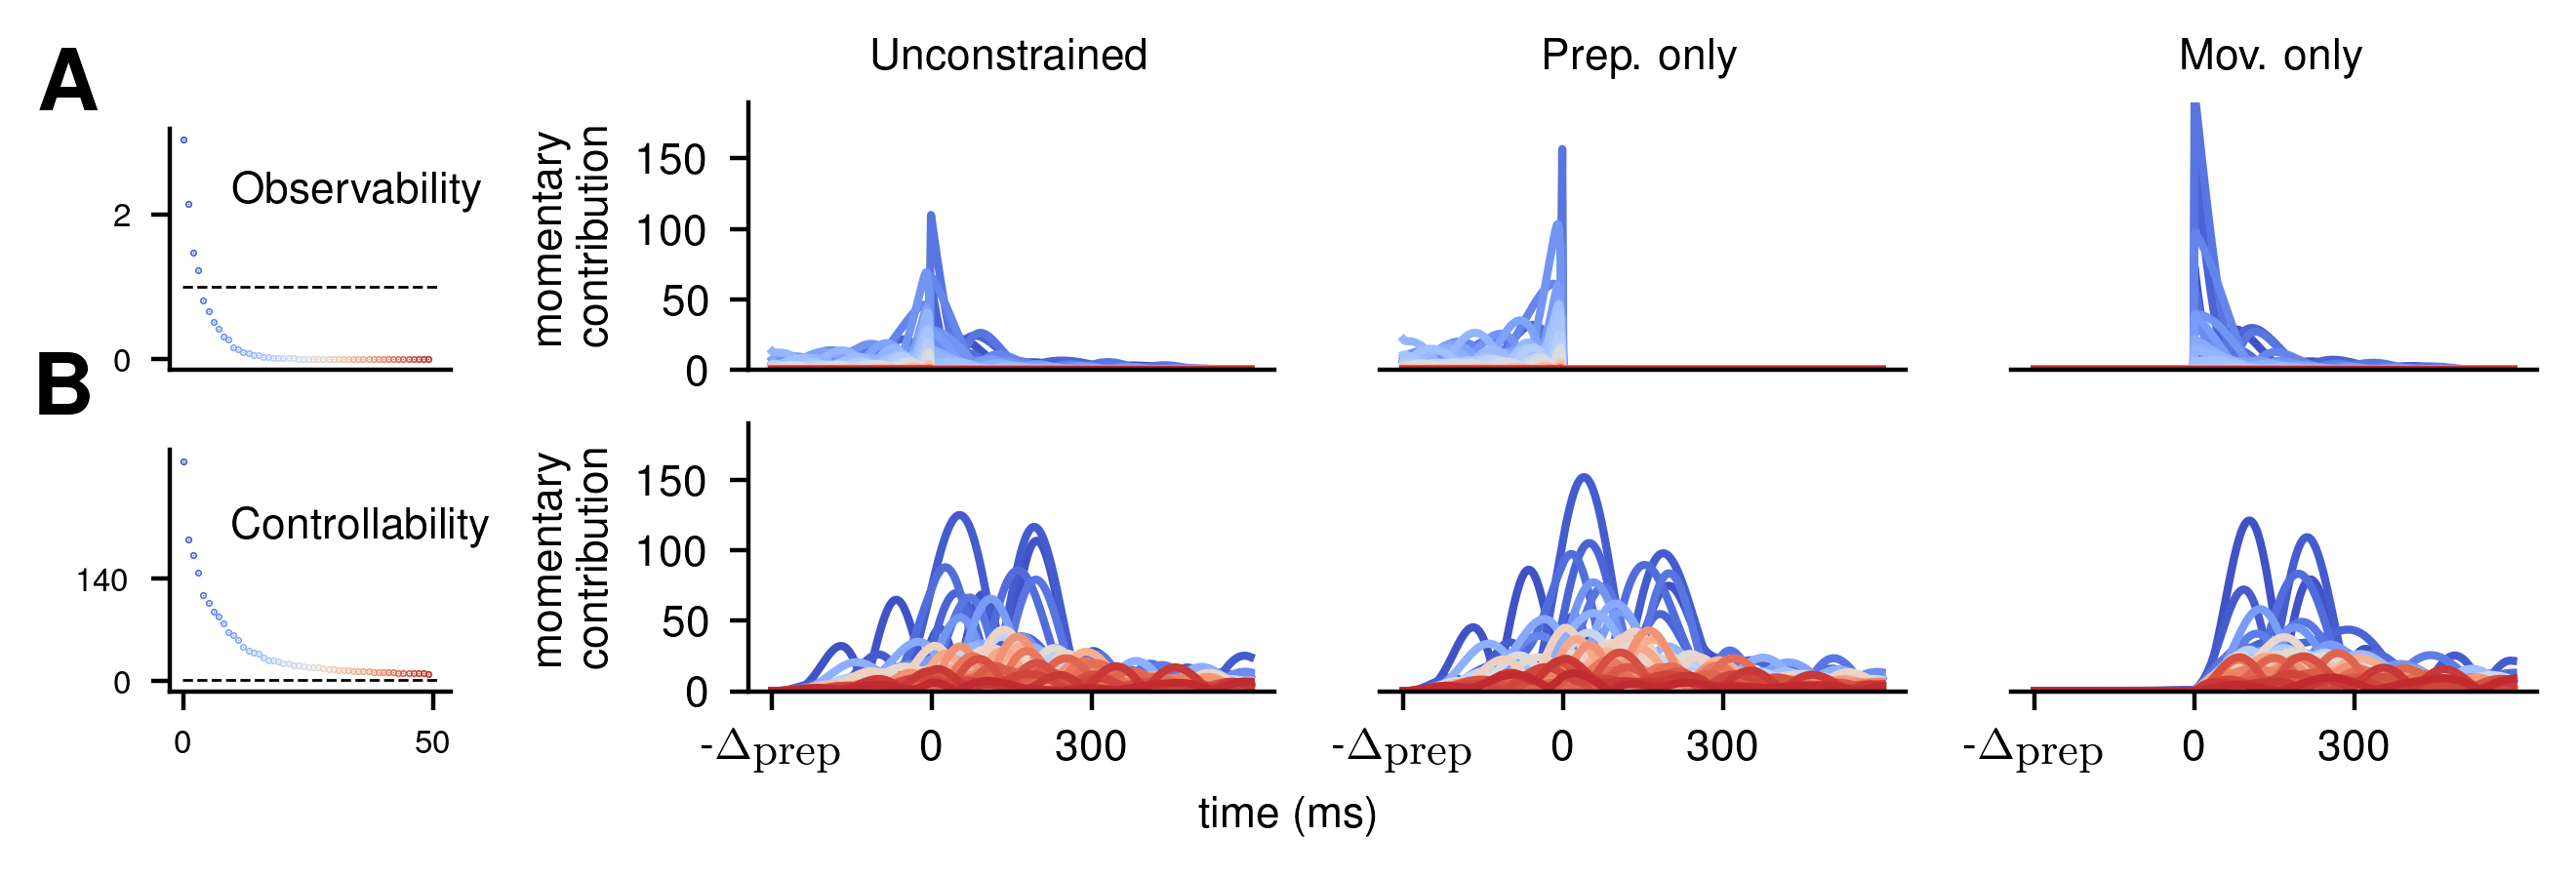

In [5]:

fig,axes=plt.subplots(2,4, figsize=(8, 2),dpi=400)
font = {'family':'sans-serif','sans-serif':'Helvetica'}
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = ['Helvetica']
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)   
# mpl.rcParams['xtick.font'] = ['Helvetica']
n = 50
n_shift = 0
p = sns.color_palette("coolwarm", n+n_shift +1)
for i in range(n):
    o = obs_c_mixed[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,1].plot(o, color=p[i+n_shift])
axes[0,1].set_title("Unconstrained")
axes[0,1].set_xticks([])
axes[0,1].set_ylim(0,190)
axes[0,1].set_yticks([0,50,100,150], [0,50,100,150], fontsize=fs)
axes[0,1].set_ylabel("momentary \n contribution")

for i in range(n):
    o = obs_c_prep[:,i]
    o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,2].plot(o, color=p[i+n_shift])
axes[0,2].set_xticks([])
axes[0,2].set_ylim(0,190)
axes[0,2].set_yticks([], [])
axes[0,2].spines["left"].set_visible(False)
axes[0,2].set_title("Prep. only")
axes[0,2].set_yticks([],[])

for i in range(n):
    o = obs_c_mov[:,i]
    o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,3].plot(obs_c_mov[:,i], color=p[i+n_shift])
axes[0,3].set_xticks([])
axes[0,3].set_ylim(0,190)
axes[0,3].spines["left"].set_visible(False)
axes[0,3].set_yticks([],[])
axes[0,3].set_title("Mov. only")

for i in range(n):
    o = ctr_mixed[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,1].plot(o, color=p[i+n_shift])
axes[1,1].set_ylabel("momentary \n contribution")
axes[1,1].set_ylim(0,190)
axes[1,1].set_yticks([0,50,100,150], [0,50,100,150], fontsize=fs)
axes[1,1].set_xticks([0,150,300], ["-$\\Delta_{\\textrm{prep}}$", 0, 300], fontsize=fs)

for i in range(n):
    o = ctr_prep[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,2].plot(o, color=p[i+n_shift])
axes[1,2].set_xticks([0,150,300], ["-$\\Delta_{\\textrm{prep}}$", 0, 300], fontsize=fs)
axes[1,2].set_ylim(0,190)
axes[1,2].spines["left"].set_visible(False)
axes[1,2].set_yticks([],[])
for i in range(n):
    o = ctr_mov[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,3].plot(o, color=p[i+n_shift])
axes[1,3].set_xticks([0,150,300], ["-$\\Delta_{\\textrm{prep}}$", 0, 300], fontsize=fs)
axes[1,3].set_ylim(0,190)
axes[1,3].set_yticks([],[])
axes[1,3].spines["left"].set_visible(False)

pos0 = axes[0,0].get_position()
axes[0,0].set_position([pos0.x0 + 0.017, pos0.y0, 0.09, 0.9*pos0.height])
axes[0,0].set_xticks([],[])
axes[0,0].set_yticks([0,2], [0,2])
#axes[0,0] = fig.add_axes([0.31,0.75, 0.035, 0.1])
for i in range(50):
    axes[0,0].plot(i,obs_eigs_mixed[i], 'o', markersize=0.3,color=p[i])
fig.text(0.162, 0.75, "Observability", size = fs)
axes[0,0].hlines(1, xmin = -0.1, xmax =  51, color = "k", linestyles = "dashed", linewidth=0.5)
#axes[0,0].set_title("Observability")


##############
pos1 = axes[1,0].get_position()
axes[1,0].set_position([pos1.x0 + 0.017, pos1.y0, 0.09, 0.9*pos1.height])
for i in range(50):
    axes[1,0].plot(i,ctr_eigs_mixed[i], 'o', markersize=0.3, color=p[i])
axes[1,0].set_xticks([0,50], [0,50], fontsize=fs_m1)
axes[1,0].set_yticks([0,1000], [0,1000], fontsize=fs_m1)
axes[1,0].hlines(1, xmin = -0.1, xmax =  51, color = "k", linestyles = "dashed", linewidth=0.5)
# axes[1,0].set_title("Controllability")
fig.text(0.162, 0.32, "Controllability", size = fs)
fig.text(0.5, -0.05, "time (ms)", size = fs, ha='center')
axes[1,0].set_yticks([0,140], [0,140])
fig.savefig("gramians.pdf", format = "pdf", bbox_inches='tight')
fig.text(0.1, 0.87, '$\\textbf{A}$', size = 16)
fig.text(0.1, 0.48, '$\\textbf{B}$', size = 16)

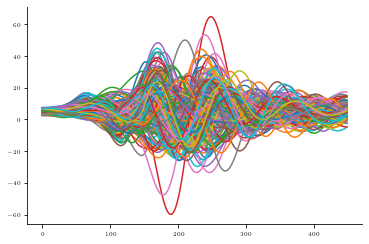

In [6]:
plt.plot(np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_mixed/rates_0_300"))


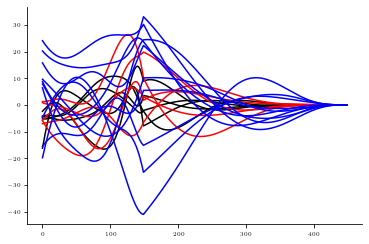

In [18]:
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001_cs/ramping_soc/us_0_0")[:,:5], "k")
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001_cs/ramping_soc/us_0_10")[:,:5], "r")
plt.plot(np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001_cs/ramping_soc/us_0_50")[:,:10], "b")

(200,)
200


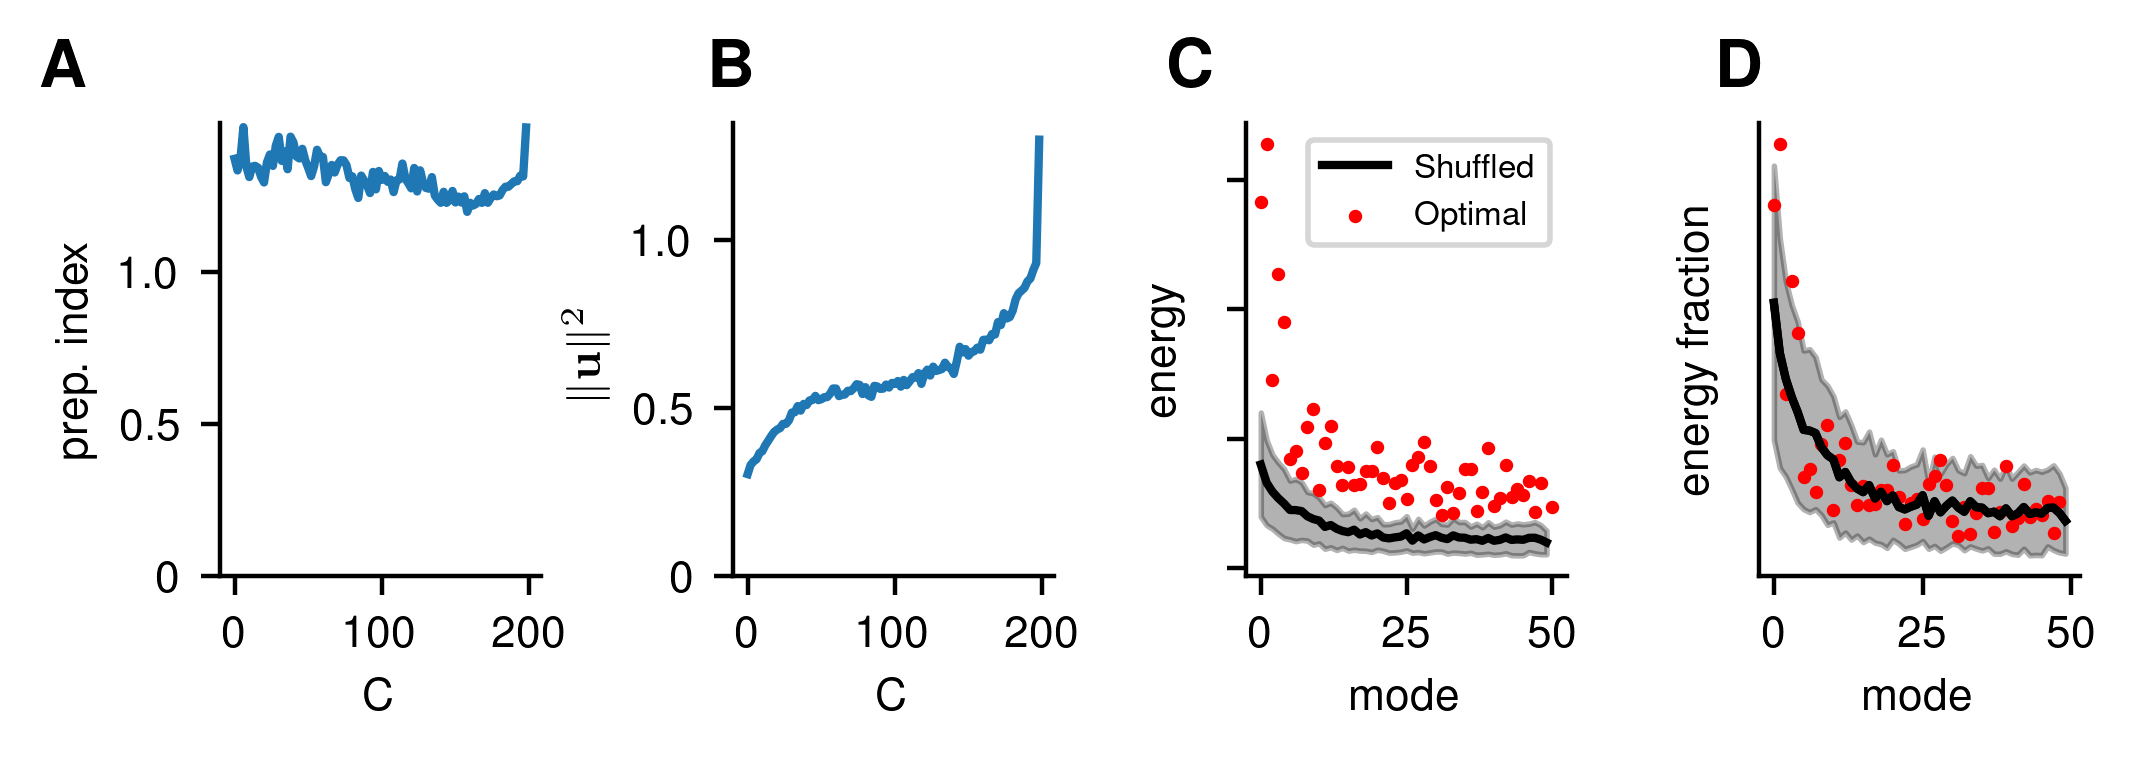

In [13]:
cs_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001_cs/ramping_soc"
n_targets = 8
def norm_us(n_c, n = 0):
    pis = []
    for n in range(n_targets):
        try :
            us = np.loadtxt(f"{cs_dir}/us_{n}_{n_c}")
            pis.append(np.linalg.norm(us)/np.sqrt(200)/450)
        except :
            assert True
    return np.mean(pis)

def get_prep_idx(n_c):
    pis = []
    for n in range(n_targets):
        try :
            us = np.loadtxt(f"{cs_dir}/us_{n}_{n_c}")
            us_prep = us[:149,:]
            us_mov = us[149:,:]
            pis.append(np.linalg.norm(us_prep)/np.linalg.norm(us_mov))
        except : 
            assert True
    return np.mean(pis)
us = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_mixed/us_shuff") 
rates0 = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_mixed/new_rates_0") 
shuffled_nums = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_mixed/shuffled_num_all")
unshuffled_nums = np.loadtxt(f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/linear_lambda_0.000001/ramping_soc/seed_0_mixed/unshuffled_num_all")
print(unshuffled_nums.shape)
pis = [get_prep_idx(n_c) for n_c in range(100)]
nus = [norm_us(n_c) for n_c in range(100)]
fig, ax = plt.subplots(1,4, figsize=(6, 1.5),dpi=400)
plt.subplots_adjust(wspace=0.6)
ax[0].plot(pis)
ax[0].set_ylabel("prep. index", fontsize = fs)
ax[0].set_xlabel("C", fontsize = fs)
ax[0].set_yticks([0,0.5, 1.0], [0,0.5,1.0], fontsize = fs)
ax[0].set_xticks([0,50,100], [0,100,200], fontsize = fs)
#####################
ax[1].plot(nus)
ax[1].set_ylabel("$\\|\\mathbf{u}\\|^2$", fontsize = fs)
ax[1].set_xlabel("C", fontsize = fs)
ax[1].set_yticks([0,0.5,1.0], [0,0.5,1.0], fontsize = fs)
ax[1].set_xticks([0,50,100], [0,100,200], fontsize = fs)
#############################
mean_en = np.mean(shuffled_nums, axis=0)
std_en = np.std(shuffled_nums, axis=0)
ax[2].plot(np.arange(50), mean_en[:50], color = 'k', label = "Shuffled")
ax[2].fill_between(np.arange(50), mean_en[:50] - 1.96*std_en[:50], mean_en[:50] + 1.96*std_en[:50], color = 'k', alpha = 0.3)
for i in np.arange(49):
    ax[2].scatter(i,unshuffled_nums[i], color = 'r', s = 2)
i = 50
ax[2].set_yticks([0, 1E6, 2E6, 3E6], [])
ax[2].set_ylabel("energy",fontsize = fs)
ax[2].set_xlabel("mode", fontsize=fs)
ax[2].set_xticks([0,25,50], [0,25,50], fontsize = fs)
ax[2].scatter(i,unshuffled_nums[i], color = 'r', s =  2, label = "Optimal")
ax[2].legend()
#############################
shuffled_nums = shuffled_nums/np.sum(shuffled_nums, axis=1)[:,None]
n = np.shape(shuffled_nums)[0]
print(n)
mean_en = np.mean(shuffled_nums, axis=0)
std_en = np.std(shuffled_nums, axis=0)
unshuffled_nums = unshuffled_nums/np.sum(unshuffled_nums)
ax[3].plot(np.arange(50), mean_en[:50], color = 'k')
ax[3].fill_between(np.arange(50), mean_en[:50] - 1.96*std_en[:50], mean_en[:50] + 1.96*std_en[:50], color = 'k', alpha = 0.3)
for i in np.arange(49):
    ax[3].scatter(i,unshuffled_nums[i], color = 'r', s = 2)
ax[3].set_yticks([0, 0.05], [])
ax[3].set_ylabel("energy fraction ",fontsize = fs)
ax[3].set_xlabel("mode", fontsize=fs)
ax[3].set_xticks([0,25,50], [0,25,50], fontsize = fs)
ax[3].plot(np.arange(50), mean_en[:50], color = 'k')

fig.text(0.33, 0.94, '$\\textbf{B}$', size = 12)
fig.text(0.05, 0.94, '$\\textbf{A}$', size = 12)
fig.text(0.52, 0.94, '$\\textbf{C}$', size = 12)
fig.text(0.75, 0.94, '$\\textbf{D}$', size = 12)
fig.savefig("analysis_ctrl_full.pdf", format = "pdf", bbox_inches='tight')

Text(0.1, 0.42, '$\\textbf{B}$')

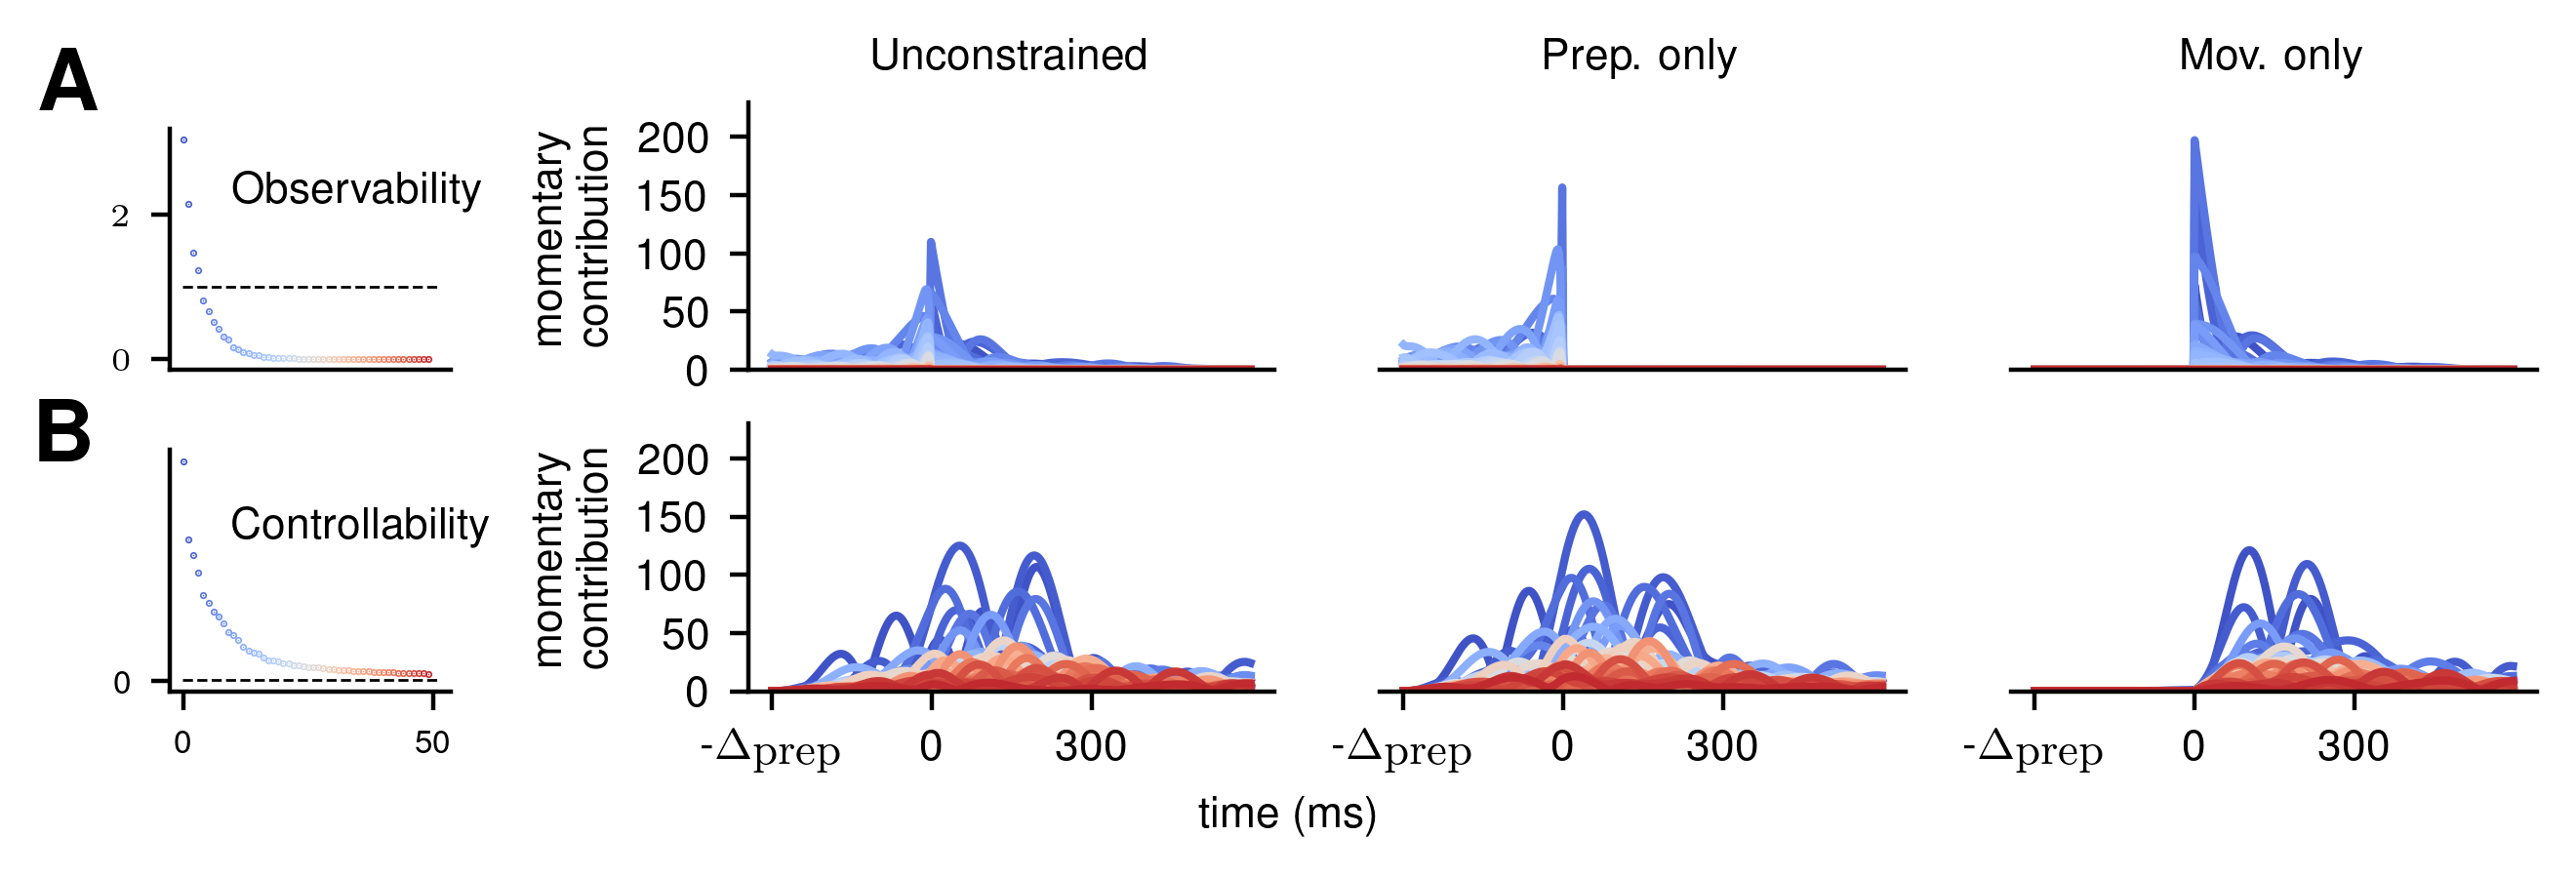

In [8]:

fig,axes=plt.subplots(2,4, figsize=(8, 2),dpi=400)
font = {'family':'sans-serif','sans-serif':'Helvetica'}
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = ['Helvetica']
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)   
# mpl.rcParams['xtick.font'] = ['Helvetica']
n = 50
n_shift = 0
p = sns.color_palette("coolwarm", n+n_shift +1)
for i in range(n):
    o = obs_c_mixed[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,1].plot(o, color=p[i+n_shift])
axes[0,1].set_title("Unconstrained")
axes[0,1].set_xticks([])
axes[0,1].set_ylim(0,230)
axes[0,1].set_yticks([0,50,100,150,200], [0,50,100,150,200], fontsize=fs)
axes[0,1].set_ylabel("momentary \n contribution")

for i in range(n):
    o = obs_c_prep[:,i]
    o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,2].plot(o, color=p[i+n_shift])
axes[0,2].set_xticks([])
axes[0,2].set_ylim(0,230)
axes[0,2].set_yticks([], [])
axes[0,2].spines["left"].set_visible(False)
axes[0,2].set_title("Prep. only")
axes[0,2].set_yticks([],[])

for i in range(n):
    o = obs_c_mov[:,i]
    o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[0,3].plot(obs_c_mov[:,i], color=p[i+n_shift])
axes[0,3].set_xticks([])
axes[0,3].set_ylim(0,230)
axes[0,3].spines["left"].set_visible(False)
axes[0,3].set_yticks([],[])
axes[0,3].set_title("Mov. only")

for i in range(n):
    o = ctr_mixed[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,1].plot(o, color=p[i+n_shift])
axes[1,1].set_ylabel("momentary \n contribution")
axes[1,1].set_ylim(0,230)
axes[1,1].set_yticks([0,50,100,150,200], [0,50,100,150,200], fontsize=fs)
axes[1,1].set_xticks([0,150,300], ["-$\\Delta_{\\textrm{prep}}$", 0, 300], fontsize=fs)

for i in range(n):
    o = ctr_prep[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,2].plot(o, color=p[i+n_shift])
axes[1,2].set_xticks([0,150,300], ["-$\\Delta_{\\textrm{prep}}$", 0, 300], fontsize=fs)
axes[1,2].set_ylim(0,230)
axes[1,2].spines["left"].set_visible(False)
axes[1,2].set_yticks([],[])
for i in range(n):
    o = ctr_mov[:,i]
    # o_max = np.abs(o).max()  
    # if not(np.isclose(np.max(o),o_max)):
    #     o = -o
    axes[1,3].plot(o, color=p[i+n_shift])
axes[1,3].set_xticks([0,150,300], ["-$\\Delta_{\\textrm{prep}}$", 0, 300], fontsize=fs)
axes[1,3].set_ylim(0,230)
axes[1,3].set_yticks([],[])
axes[1,3].spines["left"].set_visible(False)

pos0 = axes[0,0].get_position()
axes[0,0].set_position([pos0.x0 + 0.017, pos0.y0, 0.09, 0.9*pos0.height])
axes[0,0].set_xticks([],[])

#axes[0,0] = fig.add_axes([0.31,0.75, 0.035, 0.1])
for i in range(50):
    axes[0,0].plot(i,obs_eigs_mixed[i], 'o', markersize=0.3,color=p[i])
fig.text(0.162, 0.75, "Observability", size = fs)
axes[0,0].hlines(1, xmin = -0.1, xmax =  51, color = "k", linestyles = "dashed", linewidth=0.5)
#axes[0,0].set_title("Observability")


##############
pos1 = axes[1,0].get_position()
axes[1,0].set_position([pos1.x0 + 0.017, pos1.y0, 0.09, 0.9*pos1.height])
for i in range(50):
    axes[1,0].plot(i,ctr_eigs_mixed[i], 'o', markersize=0.3, color=p[i])
axes[1,0].set_xticks([0,50], [0,50], fontsize=fs_m1)
axes[1,0].set_yticks([0,1000], [0,1000], fontsize=fs_m1)
axes[1,0].hlines(1, xmin = -0.1, xmax =  51, color = "k", linestyles = "dashed", linewidth=0.5)
# axes[1,0].set_title("Controllability")
fig.text(0.162, 0.32, "Controllability", size = fs)
fig.text(0.5, -0.05, "time (ms)", size = fs, ha='center')
fig.savefig("gramians_skew.pdf", format = "pdf", bbox_inches='tight')
fig.text(0.1, 0.87, '$\\textbf{A}$', size = 16)
fig.text(0.1, 0.42, '$\\textbf{B}$', size = 16)